<img src="media/eoafrica.png" width="200px"></img>

Author: R. Rietbroek, autumn 2021

The original content of the material can be found on [the jupyter notebooks on github](https://github.com/EOAfrica/tm3-lakes-rivers)

# What you will learn
In this article you'll learn how the levels of rivers and lakes can be observed with radar altimetry missions from space. Furthermore, you'll learn about the ongoing advances in state of the art research to monitor inland waters. You'll initially get acquainted with the principles of radar altimetry, and will understand why the observation of surface waters is more challenging compared to oceanic applications for which the missions were originally designed for.
To better understand the data, and to appreciate its strengths and weaknesses, you'll perform an Jupyter notebook exercise, where you'll have a closer look at the satellite data.

## Watching Water from Space
Inland waters such as a lakes and rivers are a critical water resource for many of the worlds regions. Furthermore, in the form of waterways, they play an important role for the transport of goods and people. Interventions, such as the building of reservoirs for hydrolelectricity and agriculture, alter the flow regime of rivers, which may have economical advantages but at the same time have ecological consequences. The increase in surface water areas also have the potential to increase evaporation, and can therefore alter the water cycle.
A sustainable use of (surface) water resources is therefore essential, but can only be done with adequate monitoring of surface waters.  It is further complicated by the fact that groundwater is often depleted as an alternative when surface water sources get sparse.

<img src="media/NileImaggeoKBigge.webp" width="400px"></img>

*Surface water play a key role in food production. In the arid areas of northern Africa, the zones next to the Nile are cultivated but crucially depend on water from the river Nile. Credit: Katja Bigge (distributed via https://imaggeo.egu.eu/view/14636/)*

The use of space-based techniques promises, besides consistency of measurements, also observations of remote upstream areas. As covered by *TM5 - EO for floods, water bodies and wetlands*, optical remote sensing is a valuable tool to observe the time-varying extent of surface waters. However there is also the opportunity to observe water levels from space by making use of active radar measurementNaivelys.

# The radar altimetry record (1990's - present)
<img src="media/AltTimeline.jpg" width="400px"> </img>

*Since the 1990's, an array of radar altimeter missions have been deployed allowing studies of the ocean, ice sheets and surface waters source: Abdalla et al. 2021 https://www.sciencedirect.com/science/article/pii/S0273117721000594*

There are multiple radar altimetry missions which can potentially provide observations of inland water heights. The different missions may have varying orbits, which result in different coverages in time and space. For example, altimetry missions such as the [TOPEX/Poseidon](https://earth.esa.int/web/eoportal/satellite-missions/t/topex-poseidon) and the [Jason missions](https://earth.esa.int/web/eoportal/satellite-missions/j/jason-1), have orbit inclinations of 66 degrees, which results in no coverage in polar regions north and south of 66 degrees.

For water sensing purposes, the radar altimeters have been employing a nadir-pointing active radar. When the altimeters cross a river or lake, and the surface area of the water is large enough, an observation of the water level can be made. Such a crossing point, in combination with a water level measurement is usually denoted as a **virtual station**. Some of the altimeters have a so-called repeat orbit, which results in a repetition of the groundtrack pattern after a certain period of time (revisit times). The revisit time of altimeter missions typically ranges from 10 days (TOPEX-like) to longer,e.g. 35 days (Envisat), or even 369 days (Cryosat-2). 

Maintaining the satellites in their repeat orbit requires regular orbit manoevres, which requires sufficient on-board fuel. Often, at the end of their lifetimes, the missions will be put into a freely drifting orbit (geodetic orbit), allowing them to provide observations in between the repeat groundtracks. These datasets are valuable for e.g. the determination of slowly changing phenomena such as the ocean bathymetry, the mean sea surface, and smaller geographic features such as sea mounts which may have not been covered by the initial repeat period. Another strategy is to put the satellites in a so called interleaved-orbit, which allows multiple missions to fly at the same time with an increased spatial coverage.

# Example study: Virtual stations from radar altimetry in the Ogooue Basin (Gabon)
Bogning et al. 2018 studied the altimeter coverage in time and space in the Ogooue Basin. They furthermore compared the observations with in situ river gauge observations. They find that, over time the accuracy of the data from the virtual stations improved. Additionally, they also evaluated the much denser coverage as obtained by the cryosat-2 mission, and used a composite series with data from multi-mission records. 

From the image, you can get an impression of the groundtrack coverage over the Oguooue basin, and thus the potential of obtaining river stage estimates. The use of cryosat-2 furthermore increases the amount of potential virtual stationshttps://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-3-altimetry/instrument/lrr at the cost of the time resolution.

<img src="media/remotesensing-10-00350-g001.png" width="400px"></img>
*The monitoring of inland waters by using radar altimetry missions is a compromise between temporal resolution and spatial coverage. For Ogooue river basin (Gabon), Altimetry  groundtracks from Jason-like missions allow for 10 day revisit times, whereas Cryosat-2 groundtracks could provide a better spatial coverage at the cost of long revisit times. Source Bogning et al. 2018: https://www.mdpi.com/2072-4292/10/2/350/htm*


<img src="media/cryosat2_vs_Lambarene.jpg" width="400px"></img>
*Using Cryosat-2 virtual stations in the vicinity of the river gauge at Lambarene, shows a high agreement of the river stages with the ground truth observations.the The approximate error of retrieval lies at 25 cm. Source Bogning et al. 2018: https://www.mdpi.com/2072-4292/10/2/350/htm*

# Radar altimetry basic measurement principle

Before diving in the details of inland water monitoring, let's recap the measurement principle of radar altimetry.

<img src="media/methode_en.jpg" width="400px"><img>
*(Credits CNES/D. Ducros)*

In essence, there are two observables which need to be known to perform radar altimetry. The **range between the satellite and the reflecting surface** need to be observed, and the **orbit height** above a reference surface (commonly an ellipsoidal model) need to be determined.

Whe subtracting the range from the orbital height, an estimate of the reflecting surface above the reference surface can be obtained (see Fig. X). The measurement principle also implies that errors of the water level critically depend on both (radial) errors in the precise orbit determination and errors in the range measurements. Furthermore, geophysical phenomena such as the surface roughness, ionospheric and tropospheric path delays, tidal corrections all introduce uncertainties in the range and orbit estimates, and need to be corrected for as precise as possible.

## Precise Orbit Determination
In principle, an orbit can be computed from applying the equations of motion to the satellite moving in a prescribed gravitational field. Advances in geodesy, and gravity missions such as satellite laser ranging, the CHAMP (Challenging Mini-satellite Payload ), GRACE & GRACE-FO (Gravity Recovery and Climate Experiment and its followup), GOCE (Gravity field and steady-state Ocean Circulation Explorer), have resulted in ever improved gravity field estimates.
However, orbit determination by the integration of the equations of motion is inherently unstable due to errors in the initial condition of the satellite (position and velocity),and remaining errors of the used gravity field. Furthermore, non-gravitational surface forces such as solar radiation pressure and air drag also affect the orbit.
Alternatively, satellites can be tracked from groundstations with e.g. laser ranging or DORIS (Doppler Orbitography and Radiopositioning Integrated by Satellite) stations, or from space using Global Satellite Navigation Systems (GNSS), when the orbit is lower than that of the GNSS satellites.

<img src="media/S3LRR.jpg" width="400px"></img>
*A Laser Retro Reflector (LRR) is a passive instrument mounted on the bottom of the satellite, which will reflect laser light from the laser ranging stations. Range measurements can be made with a precision of several mm's Source: ESA https://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-3-altimetry/instrument/lrr*

<img src="media/doris_esaint.jpg" width="400px"></img>
*A Doris (Doppler Orbitography and Radiopositioning Integrated by Satellite) antenna mounted on the Earth facing side of ESA's Cryosat2 mission. The system allows to observe range rates w.r.t. the Doris ground beacons with accuracies of less than a mm/s. Source: https://www.esa.int/ESA_Multimedia/Images/2006/02/CryoSat_s_DORIS_receiver2* 

<img src="media/Network57Jason-wTracks-06-12-08.jpg" width="400px"></img>
*The Doris groundstation network cover around 60 globally distributed beacons, which constantly emit their at 2 frequencies. Source: international Doris service https://ids-doris.org/images/doris/Network57Jason-wTracks-06-12-08.jpg*

### Orbit products
In practice, orbit products are a combination of satellite tracking measurements and a numerical orbit integration, which results in orbits with cm precision (so called reduced dynamic orbits). The Doris data played an essential role in improving the orbit-accuracy of the early TOPEX/Poseidon mission. Today, combined orbit products also exist which combine Doris range rates and with onboard GNSS data to improve the accuracy even further.

## Observing the range using the radar altimeter

Naively, one would consider a radar measurement (e.g. in the Ku Band of 13.6 GHz) as a brief pulse which is emitted from the satellite. This pulse is then reflected by the surface of the earth and received again by the altimeter. The travel time, multiplied by the speed of light, would than constitute the measurement of twice the range (downward and upward path).

This helps to conceptually understand the measurement, but the observation system would be unpractical to build this way. Obtaining measurements with an accuracy of several cm's, would require very short pulse duration in the order of nanoseconds only $1cm/c=3.3ns$. This is impractical as it would require very stable oscillators. Furthermore, to have a large enough signal to noise ratio, a very strong pulse would have to be send out which would need to be received by a very large impractical antenna.

Fortunately, there is a clever way to cope with this problem, called **Full-Deramp Technique**.  Instead of sending radar pulses

Luckily, there is a clever way to 


## Sar altimetry (or delayed-doppler altimetry)

<img src="media/delay_doppler_altimetry_vs_radar_altimetry_02.png" width="400px"></img>



* Aviso*


# Chirps and retracking

<img src="media/5.2-COASTALT_webstory_fig1.gif" width="400px"></img>
*COASTALT portal*

# Understanding chirps

# Corrections
## Instrumental
## Geophysical

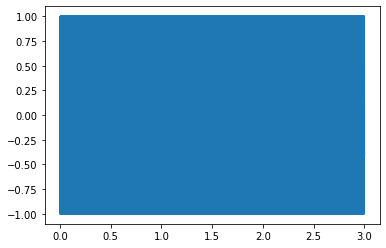

In [4]:
from IPython.display import Audio
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile # Case study: Virtual stations from radar altimetry in the Ogooue Basin
# %matplotlib widget
sr = 22050 # sample rate
T = 3.0    # duration of the chirp in seconds
t = np.linspace(0, T, int(T*sr), endpoint=False)

freq0=1000
freq1=100

B=1000 # frequency band of he chirp (freq changes from 0 to B in 3 seconds)
k=(B)/(2*T)

framp= np.linspace(freq0, freq1, int(T*sr), endpoint=False)
dt=2

chirpc=np.array([ cmath.rect(1,np.pi*(-k*(tm**2)+B*tm)) for tm in t])
chirpc_return=np.array([ cmath.rect(1,np.pi*(-k*(tm**2)+B*tm)) for tm in t+dt])


# chirpc=np.array([ cmath.rect(1,-2*np.pi*phi) for phi in framp*t]) 
# chirpc_return=np.array([ cmath.rect(1,-2*np.pi*phi*(tm+dt)) for phi,tm in zip(framp,t)]) 

dt=1
chirp = np.sin(2*np.pi*framp*t)
returnchirp = np.sin(2*np.pi*framp*(t+dt))

chirpmerge=chirpc*chirpc_return.conjugate()
dmargin=math.ceil(sr*dt)

# plt.plot(t,chirpmerge.real)
# plt.plot(t,chirpc.real)
plt.plot(t,chirpmerge.real)
Audio(chirp.real, rate=sr)
# Audio(chirpc.real, rate=sr)

#equivalent pulse bandwidth 1/chirpwidth e.g. 1/320Mhz -> 3ns


# write sounds to wav files too 
# wavfile.write('media/send_chirp.wav',sr,chirp.real)
# wavfile.write('media/mixed_chirp.wav',sr,chirpmerge.real)



# Further reading
* The [radar altimetry tutorial & toolbox](http://www.altimetry.info/) provides an excellent resource for radar altimetry workings and missions 
* https://hess.copernicus.org/articles/25/333/2021/